# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from functools import partial

## Implement Functions

### Kernels

In [2]:
def kernel_linear(x1, x2):
    return np.dot(x1, x2)

def kernel_polynomial(x1, x2, p):
    return (np.dot(x1, x2) + 1) ** p

def kernel_RBF(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * sigma ** 2))

### Objectives

In [3]:
def global_var(t, x, kernel):
    P = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            P[i][j] = t[i] * t[j] * kernel(x[i], x[j])
    return P

def objective_func(P):
    def objective(alpha):
        return 0.5 * np.dot(np.dot(P, alpha), alpha) - np.sum(alpha)
    return objective

### Constraints

In [4]:
def zerofun(t):
    def h(alpha):
        return np.dot(alpha, t)
    return h

### Minimize

In [5]:
def minimize_alpha(t, x, C, kernel):
    start = np.zeros(len(x))
    bounds = [(0, C) for b in range(len(x))]
    constraints = {'type':'eq', 'fun':zerofun(t)}
    P = global_var(t, x, kernel)
    ret = minimize(objective_func(P), start, bounds=bounds, constraints=constraints)

    alpha = ret['x']
    success = ret['success']
    return alpha, success



### Extract Non-Zero Values

In [6]:
def extract_nonzero_alpha(t, x, C, kernel):
    alpha, success = minimize_alpha(t, x, C, kernel)
    if success:
        non_zero_list = []
        for i in range(len(alpha)):
            if alpha[i] > 10 ** -5:
                list_tmp = [alpha[i], t[i], x[i]]
                non_zero_list.append(list_tmp)
        return non_zero_list
    else:
        return "Failed"

### Calculate Offset b for the hyperplane

In [7]:
def b_value(non_zero_list, kernel):
    b_sum = 0
    for i in range(len(non_zero_list)):
        b_sum += non_zero_list[i][0] * non_zero_list[i][1] * kernel(non_zero_list[i][2], non_zero_list[0][2])
    return b_sum - non_zero_list[0][1]

### Indicator

In [8]:
def indicator(x_data, non_zero_list, kernel):
    sum = 0
    for i in range(len(non_zero_list)):
        sum += non_zero_list[i][0] * non_zero_list[i][1] * kernel(non_zero_list[i][2], x_data)
    return sum - b_value(non_zero_list, kernel)

## Generating Test Data

In [49]:
# np.random.seed(42)

In [90]:
classA = np.concatenate(
    (np.random.randn(20, 2) * 0.5 + [1.0, 0.5],
    np.random.randn(20, 2) * 0.5 + [-1.0, 0.5])
)

classB = np.random.randn(40, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate(
    (np.ones(classA.shape[0]),
    -np.ones(classB.shape[0]))
)

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]


### Plotting

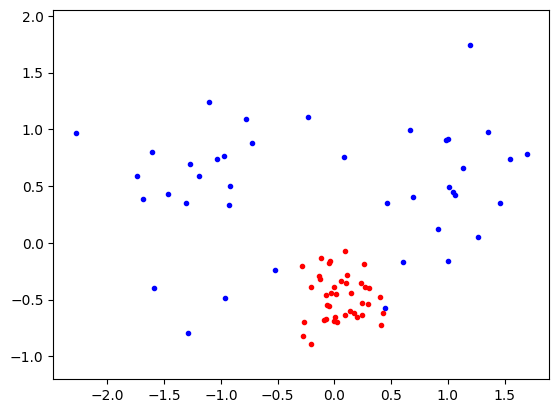

In [91]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

### Data Processing

In [11]:
inputs

array([[ 1.39481458, -0.12001188],
       [ 0.08478708, -0.27617137],
       [-1.65527834,  0.16466489],
       [ 1.6811758 ,  0.33134398],
       [-0.25142088, -0.44720659],
       [-1.14065766,  0.24219357],
       [ 0.23714616, -0.50260052],
       [-1.42292174,  0.65156121],
       [-1.28421534,  0.95333109],
       [-0.16752231, -0.62163662],
       [-1.41886594,  0.85911109],
       [ 1.66239425,  0.52939309],
       [-1.4550686 ,  0.28145784],
       [-0.06549495, -0.0424619 ],
       [-0.29982208, -0.55805312],
       [-0.06178637, -0.1405985 ],
       [ 0.18643094, -0.5826745 ],
       [ 0.27798192, -0.55429709],
       [ 0.15030904, -0.40067874],
       [ 0.05217812, -0.49285993],
       [ 1.3538894 ,  0.41741865],
       [-1.62185928,  0.51144878],
       [-1.2638611 ,  0.80647683],
       [-1.85566982,  0.35906639],
       [-0.02170851, -0.59180808],
       [-1.51438523,  0.64206862],
       [ 0.22200964, -0.65970885],
       [ 0.23930497, -0.41831629],
       [ 0.1554367 ,

## Calculating Decision Boundary

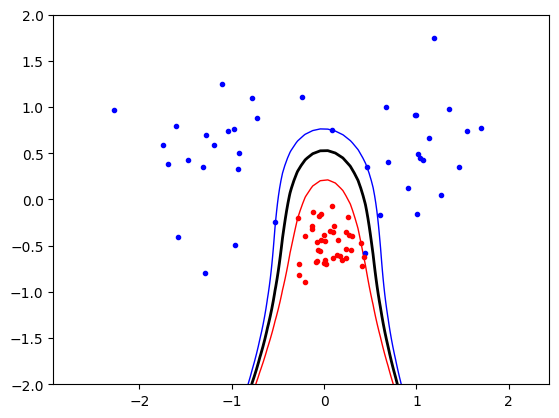

In [109]:
xgrid = np.linspace(-2, 2)
ygrid = np.linspace(-2, 2)

kernel_polynomial_p = partial(kernel_polynomial, p=3)
kernel_RBF_sigma = partial(kernel_RBF, sigma=0.6)
non_zero_list = extract_nonzero_alpha(targets, inputs, 50, kernel_polynomial_p)

grid = np.array(
    [[indicator([x, y], non_zero_list, kernel_polynomial_p) 
      for x in xgrid] 
      for y in ygrid])

plt.contour(xgrid, ygrid, grid,
            (-1.0, 0.0, 1.0),
            colors=('red', 'black', 'blue'),
            linewidths=(1, 2, 1))

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal')
plt.show()
